In [1]:
from qiskit import *

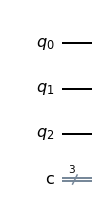

In [2]:
circuit = QuantumCircuit(3,3)
%matplotlib inline
circuit.draw(output='mpl')

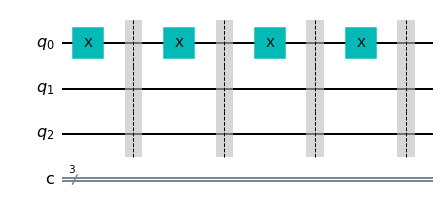

In [6]:
circuit.x([0])
circuit.barrier()
circuit.draw(output='mpl')

In [11]:
circuit.data.pop(2)

(Instruction(name='x', num_qubits=1, num_clbits=0, params=[]),
 [Qubit(QuantumRegister(3, 'q'), 0)],
 [])

In [12]:
circuit.draw()

┌───┐ ░  ░ ┌───┐ ░ ┌───┐ ░ 
q_0: ┤ X ├─░──░─┤ X ├─░─┤ X ├─░─
     └───┘ ░  ░ └───┘ ░ └───┘ ░ 
q_1: ──────░──░───────░───────░─
           ░  ░       ░       ░ 
q_2: ──────░──░───────░───────░─
           ░  ░       ░       ░ 
c: 3/═══════════════════════════

In [13]:
circuit.data.pop(3)
circuit.data.pop(4)
circuit.draw()

┌───┐ ░  ░  ░  ░ 
q_0: ┤ X ├─░──░──░──░─
     └───┘ ░  ░  ░  ░ 
q_1: ──────░──░──░──░─
           ░  ░  ░  ░ 
q_2: ──────░──░──░──░─
           ░  ░  ░  ░ 
c: 3/═════════════════

In [14]:
from qiskit.transpiler.passes import RemoveBarriers

In [15]:
circuit = RemoveBarriers()(circuit)

In [16]:
circuit.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
c: 3/═════

In [17]:
circuit.barrier()

In [18]:
circuit.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════

In [19]:
circuit.h([0])

In [20]:
circuit.data.pop(2)
circuit.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════

In [21]:
circuit.h([1])
circuit.draw()

┌───┐ ░      
q_0: ┤ X ├─░──────
     └───┘ ░ ┌───┐
q_1: ──────░─┤ H ├
           ░ └───┘
q_2: ──────░──────
           ░      
c: 3/═════════════

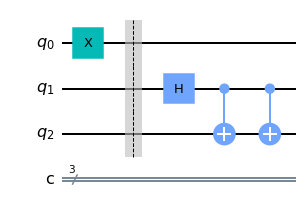

In [23]:
circuit.cx(1,2)
circuit.draw(output='mpl')

In [24]:
circuit.data.pop(4)
circuit.draw()

┌───┐ ░           
q_0: ┤ X ├─░───────────
     └───┘ ░ ┌───┐     
q_1: ──────░─┤ H ├──■──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘
c: 3/══════════════════

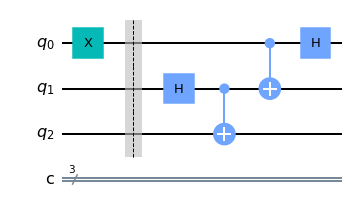

In [25]:
circuit.cx(0,1)
circuit.h([0])
circuit.draw(output='mpl')

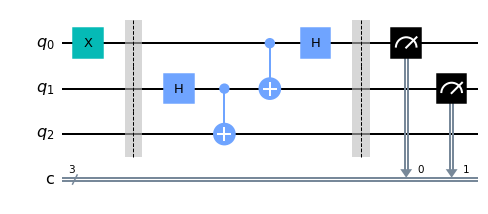

In [26]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [27]:
circuit.barrier()

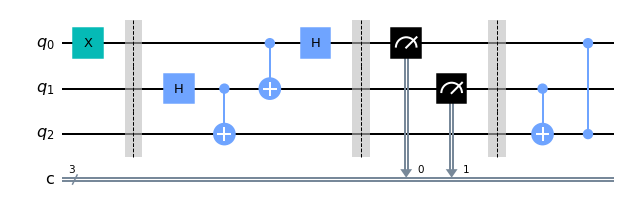

In [28]:
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

In [29]:
circuit.measure(2, 2)


In [30]:
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░            
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■────
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │    
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼────
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─┤M├
           ░      └───┘           ░  ║  ║  ░ └───┘   └╥┘
c: 3/════════════════════════════════╩══╩═════════════╩═
                                     0  1             2

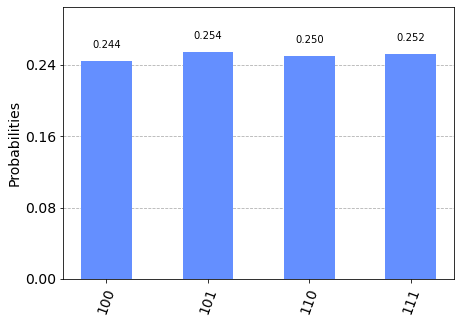

In [32]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)